In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images(img1_path, img2_path):
    #Load two images from the given paths.
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None:
        print(f"Error: Could not load image 1 from {img1_path}")
        exit()

    if img2 is None:
        print(f"Error: Could not load image 2 from {img2_path}")
        exit()

    return img1, img2

def crop_roi(image, x1, y1, x2, y2):
    #Crop the image to a region of interest (ROI).
    return image[y1:y2, x1:x2]

def align_images(img1, img2):
    #Align img2 to img1 using ORB feature detection and homography.
    
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create(500)

    # Detect and compute ORB descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Use BFMatcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Extract the matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography matrix using RANSAC
    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

    # Align img2 to img1 using the homography matrix
    aligned_img = cv2.warpPerspective(img2, M, (img1.shape[1], img1.shape[0]))

    return aligned_img

def show_images(base_image, aligned_image):
    # Display the result
    plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Base Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
    plt.title('Aligned Image'), plt.axis('off')
    plt.show()


image 1:


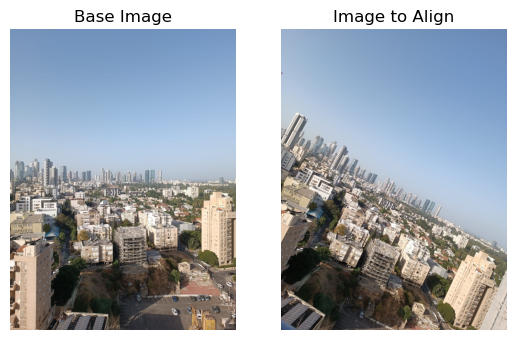

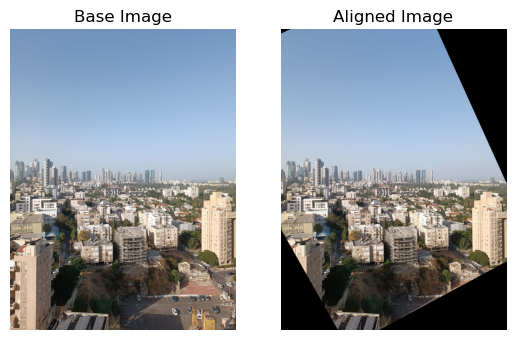


With object detection(ROI):


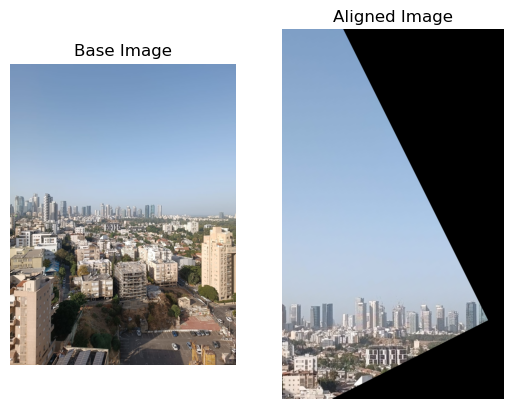


image 2:


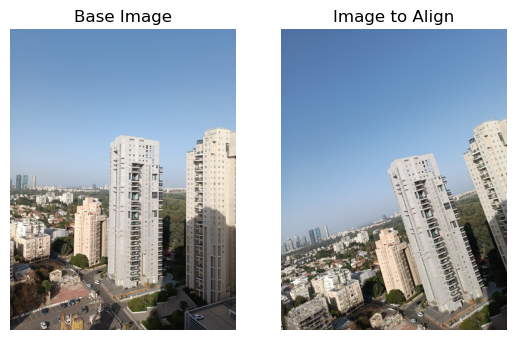

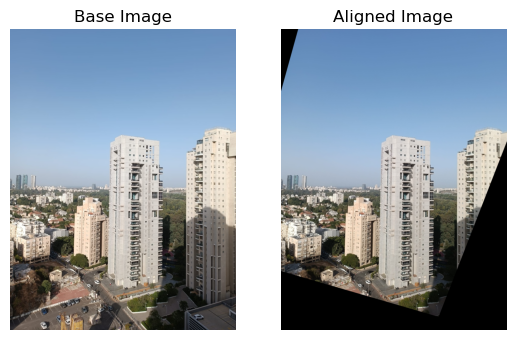


With object detection(ROI):


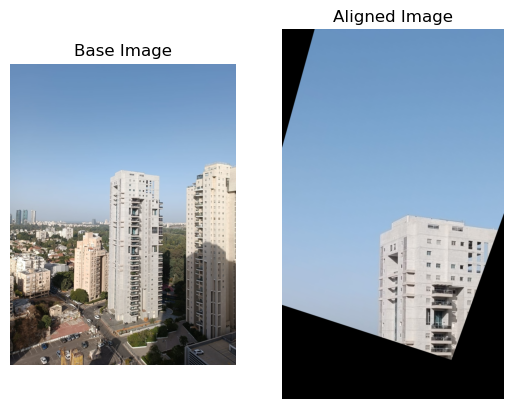

In [7]:
    print("image 1:")
    # File paths
    img1_path = r'C:\Users\Bar\Downloads\city4.jpeg'
    img2_path = r'C:\Users\Bar\Downloads\city3.jpeg'
    
    # Load images
    img1, img2 = load_images(img1_path, img2_path)
    
    #Display the base and image to align side by side.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Base Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Display original img2
    plt.title('Image to Align'), plt.axis('off')
    plt.show()

    # Define Region of Interest (ROI) coordinates (adjust according to your "goal")
    x1, y1, x2, y2 = 400, 200, 1000, 1200  # Example coordinates

    # Crop the ROI from both images
    roi_img1 = crop_roi(img1, x1, y1, x2, y2)
    roi_img2 = crop_roi(img2, x1, y1, x2, y2)

    # Align the images without ROI
    aligned_img = align_images(img1, img2)

    # Show the base image and the aligned image side by side
    show_images(img1, aligned_img)

    # Align the images based on the ROI
    print("\nWith object detection(ROI):")
    aligned_img = align_images(roi_img1, roi_img2)
    show_images(roi_img1, aligned_img)


    print("\nimage 2:")
    img1_path = r'C:\Users\Bar\Downloads\building4.jpeg'
    img2_path = r'C:\Users\Bar\Downloads\building5.jpeg'


    # Load images
    img1, img2 = load_images(img1_path, img2_path)

    #Display the base and aligned images side by side."""
    plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Base Image'), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # Display original img2
    plt.title('Image to Align'), plt.axis('off')
    plt.show()


    # Define Region of Interest (ROI) coordinates (adjust according to your "goal")
    x1, y1, x2, y2 = 400, 200, 1000, 1200  # Example coordinates

    # Crop the ROI from both images
    roi_img1 = crop_roi(img1, x1, y1, x2, y2)
    roi_img2 = crop_roi(img2, x1, y1, x2, y2)

    # Align the images without ROI

    aligned_img = align_images(img1, img2)
    # Show the base image and the aligned image side by side
    show_images(img1, aligned_img)
    # Align the images based on the ROI
    print("\nWith object detection(ROI):")
    aligned_img = align_images(roi_img1, roi_img2)
    show_images(roi_img1, aligned_img)
